In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Initialize  t, y and arrays

In [2]:
import math

dt = .1
iterations = 200

class Pendulum:
    def __init__(self):
        self.vel = [0,-0.1]
        self.theta = [1,0.99]
        self.t = [0,dt]
k = 1.0


In [3]:
def cal_accel(theta):
    accel = -(k**2)*theta
    return accel

def bashforthadams(pend):
    vn = pend.vel[-1] + 1.5*dt*cal_accel(pend.theta[-1]) - 0.5*dt*cal_accel(pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
        
def run_oscillator(pend):    
    for i in range (iterations):
        #ok = input("Vel: " + str(pend.curr_vel) + "\nPos: " + str(pend.curr_pos))
        bashforthadams(pend)
        pend.t.append(pend.t[-1]+dt)
       

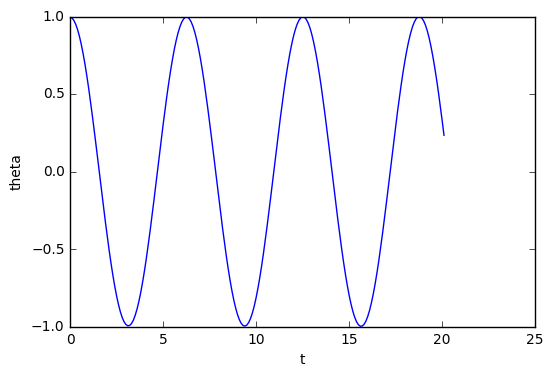

In [4]:
pend = Pendulum()
run_oscillator(pend)

plt.plot(pend.t, pend.theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

In [5]:
def solve_analytical_small():
    timestep = dt
    pend_small = Pendulum()
    t = 0
    for i in range(iterations):
            t += timestep
            pend_small.theta.append(pend_small.theta[0]*math.cos(k*t))
            pend_small.vel.append(-k*pend_small.theta[0]*math.sin(k*t))
            pend_small.t.append(t)
    return pend_small

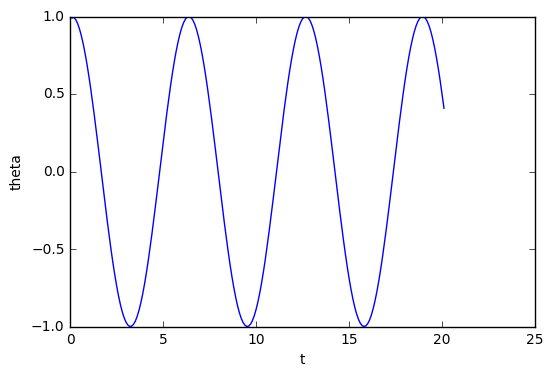

In [6]:
pend_small = solve_analytical_small()
plt.plot(pend.t, pend_small.theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

In [7]:
err = [];
for i in range(iterations+2):
    err.append(pend.theta[i] - pend_small.theta[i])

